In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

## Data Science Project Lifecycle:

1. Business Understanding: 
- This initial stage revolves around defining the business goal and understanding the problem to be solved

2. Data Collection and Understanding:
- In this stage, all relevant data sources are identified, and the data is explored to understand its structure and relevance

3. Data Preparation:
- Data preparation involves cleaning, integrating, treating missing values, handling outliers, and formatting data for analysis

4. Exploratory Data Analysis: 
- This step includes gaining insights into the data through visualization and understanding the factors that may affect the model

5. Feature Engineering: 
- Feature engineering involves selecting, deriving new features, and preparing the data for modeling

6. Modeling: 
- The modeling phase is where predictive models are built using machine learning algorithms to solve the business problem

7. Model Evaluation:
- After building models, they are rigorously evaluated to select the best-performing model for deployment

8. Model Deployment: 
- The final step is deploying the selected model in a production environment to make predictions or recommendations

- Each stage in the data science lifecycle is critical, and proper execution of these steps ensures the success of a data science project

# Business Understanding

- The main objective of using the dataset for the project "The Hourly Energy Equation: Balancing Supply and Demand in Real-Time" is to develop a model that can accurately forecast hourly energy consumption and generation in Spain, balancing supply and demand in real-time. This forecasting model will be used to optimize the energy infrastructure and ensure a reliable and efficient energy supply. <br><br>


- This project revolves around a comprehensive dataset spanning four years, capturing crucial insights into Spain's electrical ecosystem. The data amalgamates hourly records of electrical consumption and generation, settlement prices, and pertinent weather information for the five largest cities in Spain. Sourced from ENTSOE (Transmission Service Operator data) and REE (Red Electric España - Spanish TSO), this dataset not only provides a rich repository of historical information but also includes forecasts by the Transmission Service Operator (TSO) for both consumption and pricing. .<br><br>


- The dataset is unique because it contains hourly data for electrical consumption and the respective forecasts by the TSO for consumption and pricing. This allows for a more accurate and detailed analysis of energy demand and supply patterns, which is essential for developing a model that can balance supply and demand in real-time.<br><br>


- The dataset is publicly available via ENTSOE and REE and may be found in the links provided. The inspiration behind using this dataset is the potential for deep learning and machine learning techniques to improve energy forecasting and contribute to the transition to a renewable-based electrical infrastructure<br><br>

# Problem Statement 

1. The energy sector is undergoing a radical transformation, with the transition to renewable energy sources and the need to balance supply and demand in real-time becoming increasingly important <br><br>

2. The main challenges facing the power grid are the integration of bidirectional energy flows, the management of non-dispatchable generation, and the deployment of a digital telecommunications infrastructure that allows control and automation

- In the context of this project, the problem statement can be defined as:<br><br>

- "How can we develop a model that accurately forecasts hourly energy consumption and generation in Spain, balancing supply and demand in real-time, using the provided dataset of electrical consumption, generation, pricing, and weather data for Spain?"<br><br>

3. The objective is to create a model that can handle the changing demand for electricity and the use of different energy sources in today's fast-changing world, ensuring a reliable and efficient energy supply.<br><br>

4. This model will be used to optimize the energy infrastructure and maintain a high level of reliability in the power grid

# References

- [What is ENTSOE?](https://transparency.entsoe.eu/dashboard/show)
- [What About REE? ](https://www.esios.ree.es/en/market-and-prices?date=11-03-2024)


In [24]:
# Set pandas display options to show all columns
pd.set_option('display.max_columns', None)

# Data Collection and Understanding

In [25]:
dfw = pd.read_csv("dfw.csv")
dfe = pd.read_csv("dfe.csv")

In [26]:
#ELECTRICITY DATA
dfe.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [22]:
dfe.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

**Data Understanding - Short Explanation of Columns:**

1. **Time (Datetime Index Localized to CET):**
   - Represents the temporal aspect of the dataset, with a datetime index localized to Central European Time (CET).<br><br>

2. **Fossil Generation:**
   - Biomass: Biomass generation in MW.
   - Brown Coal/Lignite: Coal/lignite generation in MW.
   - Coal-Derived Gas: Coal gas generation in MW.
   - Fossil Gas: Gas generation in MW.
   - Fossil Hard Coal: Hard coal generation in MW.
   - Fossil Oil: Oil generation in MW.
   - Fossil Oil Shale: Shale oil generation in MW.
   - Fossil Peat: Peat generation in MW.<br><br>

3. **Hydro Generation:**
   - Pumped Storage Aggregated: Hydro1 generation in MW.
   - Pumped Storage Consumption: Hydro2 generation in MW.
   - Run-of-River and Poundage: Hydro3 generation in MW.
   - Water Reservoir: Hydro4 generation in MW.<br><br>

4. **Renewable Generation:**
   - Geothermal: Geothermal generation in MW.
   - Marine: Sea generation in MW.
   - Solar: Solar generation in MW.
   - Waste: Waste generation in MW.
   - Wind Offshore: Wind offshore generation in MW.
   - Wind Onshore: Wind onshore generation in MW.<br><br>
   
   
5. **Forecast Solar Day Ahead:**
    - Reflects the forecasted solar generation, providing an estimate of solar electricity generation for the next day.<br><br>

6. **Forecast Wind Offshore Eday Ahead:**
    - Represents the forecasted offshore wind generation, offering an estimate of offshore wind electricity generation for the next day.<br><br>

7. **Forecast Wind Onshore Day Ahead:**
    - Indicates the forecasted onshore wind generation, offering an estimate of onshore wind electricity generation for the next day.<br><br>

8. **Total Load Forecast:**
    - Reflects the forecasted electrical demand, providing an estimate of the total electricity demand for a specific period.<br><br>

9. **Total Load Actual:**
    - Quantifies the actual electrical demand, indicating the real-time total electricity demand for a specific period.<br><br>

10. **Price Day Ahead:**
    - Represents the forecasted electricity price in euros per megawatt-hour (EUR/MWh) for a specific period.<br><br>

11. **Price Actual:**
    - Indicates the actual electricity price in euros per megawatt-hour (EUR/MWh) for a specific period.<br><br>

These columns collectively provide a comprehensive snapshot of Spain's electrical generation, consumption, pricing, and renewable energy forecast data, allowing for in-depth analysis and forecasting.


In [23]:
#WEATHER DATA
dfw.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [24]:
dfw.columns

Index(['dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

**Data Understanding - Short Explanation of Columns:**

1. **DateTime and Location:**
   - `dt_iso`: Datetime index localized to CET.
   - `city_name`: Name of the city.

2. **Temperature and Pressure:**
   - `temp`: Temperature in Kelvin.
   - `temp_min`: Minimum temperature in Kelvin.
   - `temp_max`: Maximum temperature in Kelvin.
   - `pressure`: Atmospheric pressure in hPa.

3. **Humidity and Wind:**
   - `humidity`: Humidity in percentage.
   - `wind_speed`: Wind speed in m/s.
   - `wind_deg`: Wind direction.

4. **Precipitation and Snow:**
   - `rain_1h`: Rain in the last hour in mm.
   - `rain_3h`: Rain in the last 3 hours in mm.
   - `snow_3h`: Snow in the last 3 hours in mm.

5. **Cloud Cover and Weather Description:**
   - `clouds_all`: Cloud cover in percentage.
   - `weather_id`: Code used to describe weather.
   - `weather_main`: Short description of current weather.
   - `weather_description`: Long description of current weather.
   - `weather_icon`: Weather icon code for the website.

These columns collectively provide comprehensive weather-related information, including temperature, pressure, humidity, wind speed, precipitation, cloud cover, and weather descriptions, facilitating detailed analysis and forecasting.


# Data Exploration and Preparation

In [27]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [28]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

In [419]:
dfe.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [27]:
dfw['dt_iso'] = pd.to_datetime(dfw['dt_iso'], errors='coerce', utc=True)
dfe['time'] = pd.to_datetime(dfe['time'], errors='coerce', utc=True)

In [28]:
# 'time' and 'dt_iso' are the common columns
merged_df = pd.merge(dfe, dfw, left_on='time', right_on='dt_iso', how='inner')

In [29]:
# If the common column is no longer needed, you can drop it
merged_df = merged_df.drop(['dt_iso'], axis=1)

In [32]:
merged_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.1,65.41,Valencia,270.475000,270.475000,270.475000,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.1,65.41,Madrid,267.325000,267.325000,267.325000,971,63,1,309,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.1,65.41,Bilbao,269.657312,269.657312,269.657312,1036,97,0,226,0.0,0.0,0.0,0,800,clear,sky is clear,01
3,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.1,65.41,Barcelona,281.625000,281.625000,281.625000,1035,100,7,58,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.1,65.41,Seville,273.375000,273.375000,273.375000,1039,75,1,21,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [33]:
merged_df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed',

In [30]:
duplicate_count = merged_df.duplicated(subset=['time']).sum()

# Print the count of duplicates
print("Number of duplicates based on time column:", duplicate_count)

Number of duplicates based on time column: 143332


In [424]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178396 entries, 0 to 178395
Data columns (total 45 columns):
 #   Column                                       Non-Null Count   Dtype              
---  ------                                       --------------   -----              
 0   time                                         178396 non-null  datetime64[ns, UTC]
 1   generation biomass                           178301 non-null  float64            
 2   generation fossil brown coal/lignite         178306 non-null  float64            
 3   generation fossil coal-derived gas           178306 non-null  float64            
 4   generation fossil gas                        178306 non-null  float64            
 5   generation fossil hard coal                  178306 non-null  float64            
 6   generation fossil oil                        178301 non-null  float64            
 7   generation fossil oil shale                  178306 non-null  float64            
 8   generation fos

In [31]:
merged_df = merged_df.drop_duplicates(subset=['time'])

In [427]:
merged_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
5,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
10,2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
15,2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
20,2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [428]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35064 entries, 0 to 178391
Data columns (total 45 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         35064 non-null  datetime64[ns, UTC]
 1   generation biomass                           35045 non-null  float64            
 2   generation fossil brown coal/lignite         35046 non-null  float64            
 3   generation fossil coal-derived gas           35046 non-null  float64            
 4   generation fossil gas                        35046 non-null  float64            
 5   generation fossil hard coal                  35046 non-null  float64            
 6   generation fossil oil                        35045 non-null  float64            
 7   generation fossil oil shale                  35046 non-null  float64            
 8   generation fossil peat   

In [429]:
merged_df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,35045.000000,35045.000000,35046.000000,35045.0,35047.000000,35046.000000,35046.000000,35046.000000,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,475.577343,972.116108,2605.114735,0.0,6263.907039,60.228585,85.639702,1432.665925,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023,290.783954,290.225644,291.357900,1015.979381,65.093971,2.692477,160.801648,0.034458,0.000227,0.000154,20.740475,782.171800
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,792.406614,400.777536,1835.199745,0.0,839.667958,20.238381,14.077554,1680.119887,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083,7.234569,7.090499,7.523438,11.937650,19.678281,2.582959,120.412607,0.263594,0.003535,0.011912,25.604016,76.809176
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000,268.830656,268.830656,268.830656,969.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,0.000000,637.000000,1077.250000,0.0,5760.000000,53.000000,73.000000,71.000000,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500,285.150000,285.150000,285.650000,1012.000000,51.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.000000,800.000000
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,68.000000,906.000000,2164.000000,0.0,6566.000000,57.000000,88.000000,616.000000,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000,290.190000,290.150000,291.150000,1017.000000,67.000000,2.000000,130.000000,0.000000,0.000000,0.000000,20.000000,800.000000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,616.000000,1250.000000,3757.000000,0.0,7025.000000,80.000000,97.000000,2578.000000,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000,296.150000,295.370000,297.150000,1021.000000,82.000000,4.000000,280.000000,0.000000,0.000000,0.000000,20.000000,801.000000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,4523.000000,2000.000000,9728.000000,0.0,7117.000000,106.000000,119.000000,5792.000000,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000,311.150000,311.150000,314.820000,1087.000000,100.000000,133.000000,360.000000,12.000000,0.100000,1.125000,100.000000,804.000000


In [430]:
merged_df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed',

In [32]:
# select spedified columns in the dataframe 
new_columns =['time', 'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil','generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage','generation hydro water reservoir','generation nuclear', 
        'generation other', 'generation other renewable','generation solar', 'generation waste','generation wind onshore',
        'total load actual','price actual','temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed','clouds_all',
        'weather_main']

In [33]:
merged_new = merged_df.loc[:,new_columns]

In [434]:
merged_new.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_main
0,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41,270.475,270.475,1001,77,1,0,clear
5,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92,270.475,270.475,1001,77,1,0,clear
10,2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48,269.686,269.686,1002,78,0,0,clear
15,2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32,269.686,269.686,1002,78,0,0,clear
20,2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04,269.686,269.686,1002,78,0,0,clear


In [34]:
merged_new.rename(columns={"generation wind onshore": "generation wind"}, inplace=True)


In [436]:
merged_new.isnull().sum()

time                                            0
generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind                                18
total load actual                              36
price actual                                    0
temp_min                                        0
temp_max                                        0
pressure                                        0


In [35]:
# Remove rows with null values from the DataFrame
merged_new = merged_new.dropna()

In [438]:
# Check if there are any null values in the DataFrame
null_check = df.isnull().values.any()

# Print True if there are null values, False if there are no null values
print(null_check)

False


In [36]:
merged_new['time'] = pd.to_datetime(merged_new['time'], errors='coerce', utc=True)

In [441]:
merged_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35018 entries, 0 to 178391
Data columns (total 24 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         35018 non-null  datetime64[ns, UTC]
 1   generation biomass                           35018 non-null  float64            
 2   generation fossil brown coal/lignite         35018 non-null  float64            
 3   generation fossil gas                        35018 non-null  float64            
 4   generation fossil hard coal                  35018 non-null  float64            
 5   generation fossil oil                        35018 non-null  float64            
 6   generation hydro pumped storage consumption  35018 non-null  float64            
 7   generation hydro run-of-river and poundage   35018 non-null  float64            
 8   generation hydro water re

In [442]:
merged_new.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all
count,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000
mean,383.528614,448.115940,5622.496373,4255.618625,298.333114,475.712833,972.081787,2604.490862,6264.021817,60.237107,85.651436,1433.054201,269.502142,5466.056742,28696.833457,57.887268,290.232235,291.364570,1015.986179,65.096665,2.692387,20.747159
std,85.303560,354.608322,2202.043540,1961.420351,52.469975,792.546192,400.751496,1834.938030,838.274351,20.236076,14.063817,1680.323255,50.143242,3213.580919,4574.173105,14.190082,7.089812,7.522657,11.939170,19.677740,2.583226,25.602385
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18041.000000,9.330000,268.830656,268.830656,969.000000,8.000000,0.000000,0.000000
25%,333.000000,0.000000,4126.000000,2527.000000,263.000000,0.000000,637.000000,1077.000000,5760.000000,53.000000,74.000000,71.000000,240.000000,2935.000000,24808.000000,49.360000,285.150000,285.659000,1012.000000,51.000000,1.000000,0.000000
50%,367.000000,509.000000,4968.000000,4473.000000,300.000000,68.000000,906.000000,2164.000000,6564.000000,57.000000,88.000000,616.000000,279.000000,4850.000000,28901.500000,58.020000,290.150000,291.150000,1017.000000,67.000000,2.000000,20.000000
75%,433.000000,757.000000,6428.750000,5837.000000,330.000000,616.000000,1250.000000,3755.000000,7024.000000,80.000000,97.000000,2578.750000,310.000000,7399.000000,32192.000000,68.000000,295.370000,297.150000,1021.000000,82.000000,4.000000,20.000000
max,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,119.000000,5792.000000,357.000000,17436.000000,41015.000000,116.800000,311.150000,314.820000,1087.000000,100.000000,133.000000,100.000000


In [443]:
merged_new.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind', 'total load actual',
       'price actual', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'clouds_all', 'weather_main'],
      dtype='object')

In [37]:
# Extract date and hour components
merged_new['date'] = merged_new['time'].dt.date
merged_new['hour'] = merged_new['time'].dt.hour
# Extract month, week, and day
merged_new['month'] = merged_new['time'].dt.month
merged_new['week'] = merged_new['time'].dt.isocalendar().week  # ISO week number
merged_new['day'] = merged_new['time'].dt.day
merged_new['year'] = merged_new['time'].dt.year

In [38]:
merged_new = merged_new.drop(columns=['time'])

In [39]:
# Reordering the columns
merged_new = merged_new[['date','year','month','week','day','hour'] 
                        + [col for col in merged_new.columns if col not in 
                           ['date','year','month','week','day','hour']]]

In [40]:
merged_new.head()

,date,year,month,week,day,hour,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_main
0,2014-12-31,2014,12,1,31,23,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41,270.475,270.475,1001,77,1,0,clear
5,2015-01-01,2015,1,1,1,0,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92,270.475,270.475,1001,77,1,0,clear
10,2015-01-01,2015,1,1,1,1,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48,269.686,269.686,1002,78,0,0,clear
15,2015-01-01,2015,1,1,1,2,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32,269.686,269.686,1002,78,0,0,clear
20,2015-01-01,2015,1,1,1,3,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04,269.686,269.686,1002,78,0,0,clear


# EXPLORATORY DATA ANALYSIS

In [41]:
# Create a copy of the original DataFrame
df_eda = merged_new.copy()

# Perform your EDA on the copied DataFrame (df_copy)
# For example, you can check the first few rows of the copied DataFrame
df_eda.head()

,date,year,month,week,day,hour,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_main
0,2014-12-31,2014,12,1,31,23,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41,270.475,270.475,1001,77,1,0,clear
5,2015-01-01,2015,1,1,1,0,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92,270.475,270.475,1001,77,1,0,clear
10,2015-01-01,2015,1,1,1,1,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48,269.686,269.686,1002,78,0,0,clear
15,2015-01-01,2015,1,1,1,2,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32,269.686,269.686,1002,78,0,0,clear
20,2015-01-01,2015,1,1,1,3,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04,269.686,269.686,1002,78,0,0,clear


In [237]:
# Set pandas display options to show all columns
pd.set_option('display.max_columns', None)

# Display the first 5 rows of the DataFrame with all columns visible
df_eda.head()

,date,year,month,week,day,hour,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual
11,2015-01-01,2015,1,1,1,10,421.0,226.0,3931.0,3845.0,166.0,1183.0,1069.0,1516.0,7097.0,42.0,73.0,3197.0,206.0,2771.0,23547.0,59.86
12,2015-01-01,2015,1,1,1,11,428.0,303.0,3784.0,4220.0,167.0,972.0,1052.0,1204.0,7097.0,41.0,75.0,3885.0,209.0,2906.0,24133.0,60.12
13,2015-01-01,2015,1,1,1,12,425.0,288.0,3754.0,4404.0,167.0,922.0,1041.0,1286.0,7099.0,40.0,74.0,4007.0,210.0,2923.0,24713.0,62.05
14,2015-01-01,2015,1,1,1,13,423.0,260.0,3779.0,4256.0,166.0,941.0,1028.0,1027.0,7097.0,40.0,76.0,3973.0,210.0,2945.0,24672.0,62.06
16,2015-01-01,2015,1,1,1,15,422.0,256.0,3813.0,4191.0,163.0,970.0,1032.0,1156.0,7095.0,41.0,75.0,3088.0,211.0,2552.0,23118.0,61.18


In [450]:
df_eda.describe()

,year,month,week,day,hour,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all
count,35018.000000,35018.000000,35018.0,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000
mean,2016.500942,6.525815,26.675081,15.736393,11.499714,383.528614,448.115940,5622.496373,4255.618625,298.333114,475.712833,972.081787,2604.490862,6264.021817,60.237107,85.651436,1433.054201,269.502142,5466.056742,28696.833457,57.887268,290.232235,291.364570,1015.986179,65.096665,2.692387,20.747159
std,1.117513,3.447927,15.060199,8.797409,6.923293,85.303560,354.608322,2202.043540,1961.420351,52.469975,792.546192,400.751496,1834.938030,838.274351,20.236076,14.063817,1680.323255,50.143242,3213.580919,4574.173105,14.190082,7.089812,7.522657,11.939170,19.677740,2.583226,25.602385
min,2014.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18041.000000,9.330000,268.830656,268.830656,969.000000,8.000000,0.000000,0.000000
25%,2016.000000,4.000000,14.0,8.000000,5.000000,333.000000,0.000000,4126.000000,2527.000000,263.000000,0.000000,637.000000,1077.000000,5760.000000,53.000000,74.000000,71.000000,240.000000,2935.000000,24808.000000,49.360000,285.150000,285.659000,1012.000000,51.000000,1.000000,0.000000
50%,2017.000000,7.000000,27.0,16.000000,11.000000,367.000000,509.000000,4968.000000,4473.000000,300.000000,68.000000,906.000000,2164.000000,6564.000000,57.000000,88.000000,616.000000,279.000000,4850.000000,28901.500000,58.020000,290.150000,291.150000,1017.000000,67.000000,2.000000,20.000000
75%,2018.000000,10.000000,40.0,23.000000,17.750000,433.000000,757.000000,6428.750000,5837.000000,330.000000,616.000000,1250.000000,3755.000000,7024.000000,80.000000,97.000000,2578.750000,310.000000,7399.000000,32192.000000,68.000000,295.370000,297.150000,1021.000000,82.000000,4.000000,20.000000
max,2018.000000,12.000000,53.0,31.000000,23.000000,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,119.000000,5792.000000,357.000000,17436.000000,41015.000000,116.800000,311.150000,314.820000,1087.000000,100.000000,133.000000,100.000000


In [400]:
df_eda.to_csv('df_eda.csv', index=False)

In [451]:
df_eda.columns

Index(['date', 'year', 'month', 'week', 'day', 'hour', 'generation biomass',
       'generation fossil brown coal/lignite', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind', 'total load actual',
       'price actual', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'clouds_all', 'weather_main'],
      dtype='object')

In [453]:
# Assuming df_eda is your DataFrame
unique_weather_categories = df_eda['weather_main'].unique()

print("Unique Weather Categories:")
print(unique_weather_categories)

Unique Weather Categories:
['clear' 'clouds' 'rain' 'mist' 'thunderstorm' 'drizzle' 'fog' 'smoke'
 'haze']


In [17]:
import matplotlib.pyplot as plt

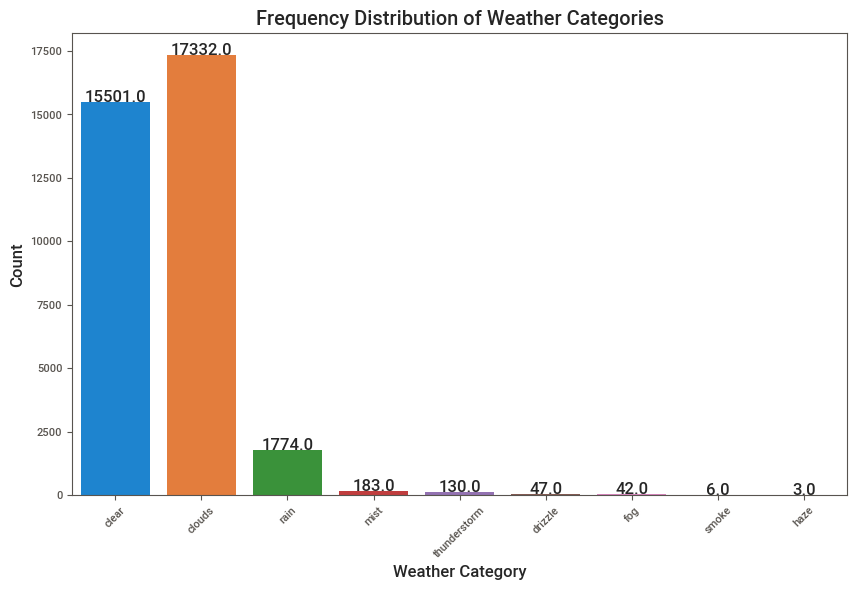

In [455]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='weather_main', data=df_eda)
plt.title('Frequency Distribution of Weather Categories')
plt.xlabel('Weather Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

In [43]:
df_eda['weather_main'] = df_eda['weather_main'].replace({
    'mist': 'clouds',
    'thunderstorm': 'rain',
    'drizzle': 'rain',
    'fog': 'clouds',
    'smoke': 'clear',
    'haze': 'clouds'
})

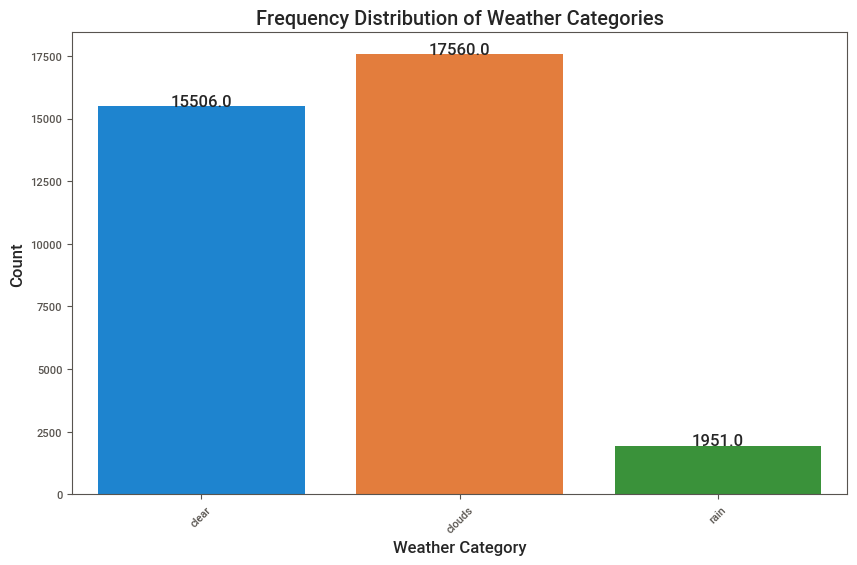

In [485]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='weather_main', data=df_eda)
plt.title('Frequency Distribution of Weather Categories')
plt.xlabel('Weather Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

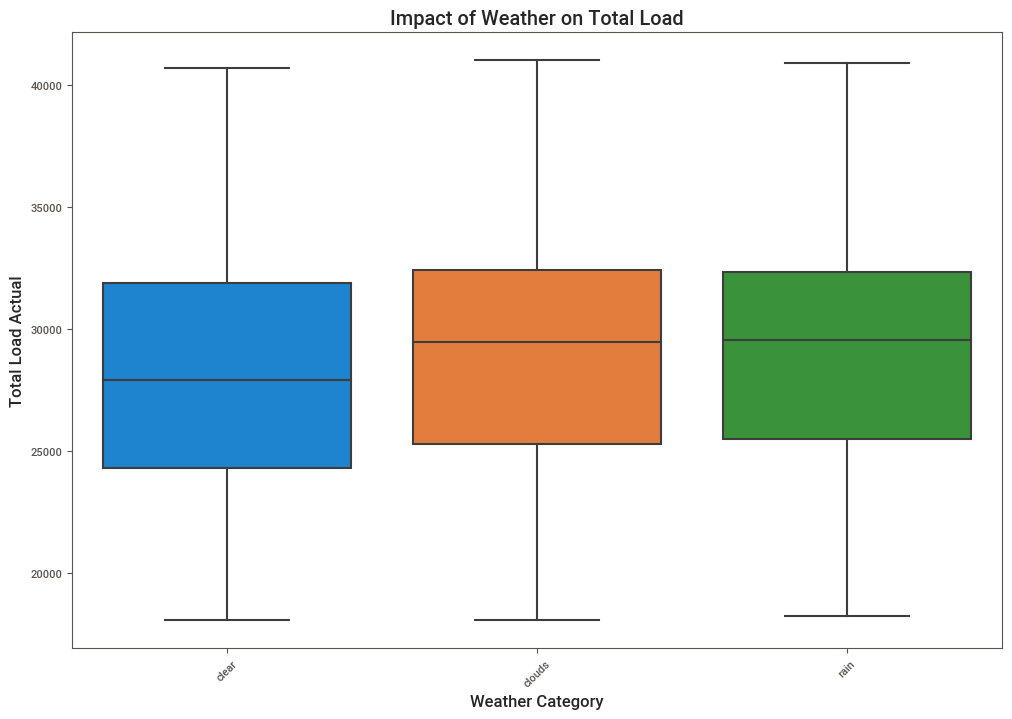

In [487]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='weather_main', y='total load actual', data=df_eda)
plt.title('Impact of Weather on Total Load')
plt.xlabel('Weather Category')
plt.ylabel('Total Load Actual')
plt.xticks(rotation=45)
plt.show()

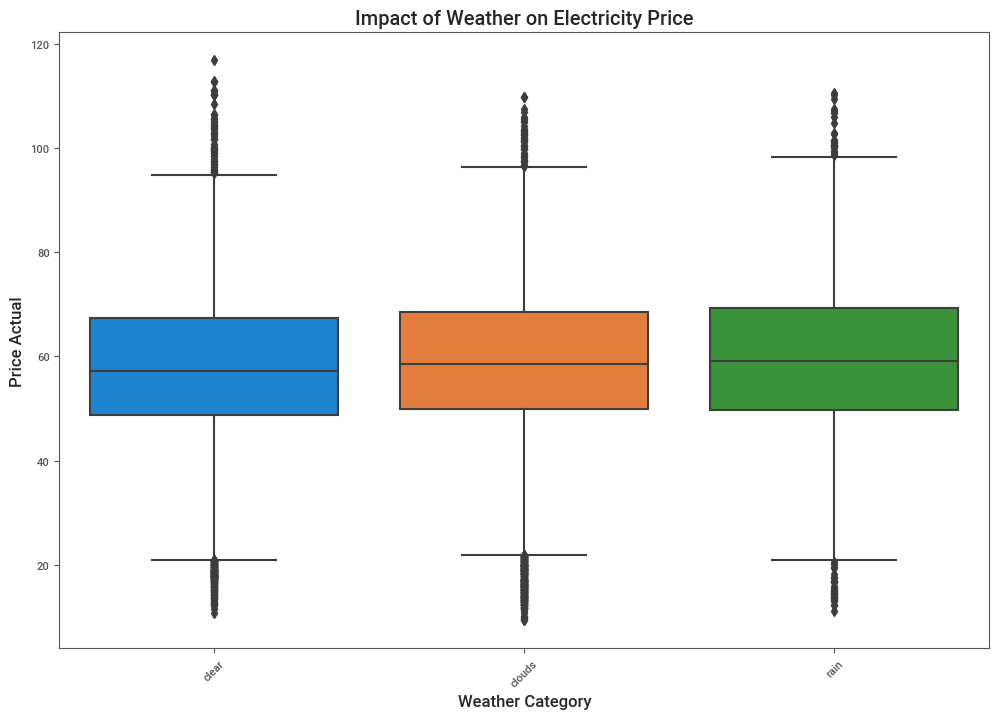

In [488]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='weather_main', y='price actual', data=df_eda)
plt.title('Impact of Weather on Electricity Price')
plt.xlabel('Weather Category')
plt.ylabel('Price Actual')
plt.xticks(rotation=45)
plt.show()

In [19]:
import seaborn as sns

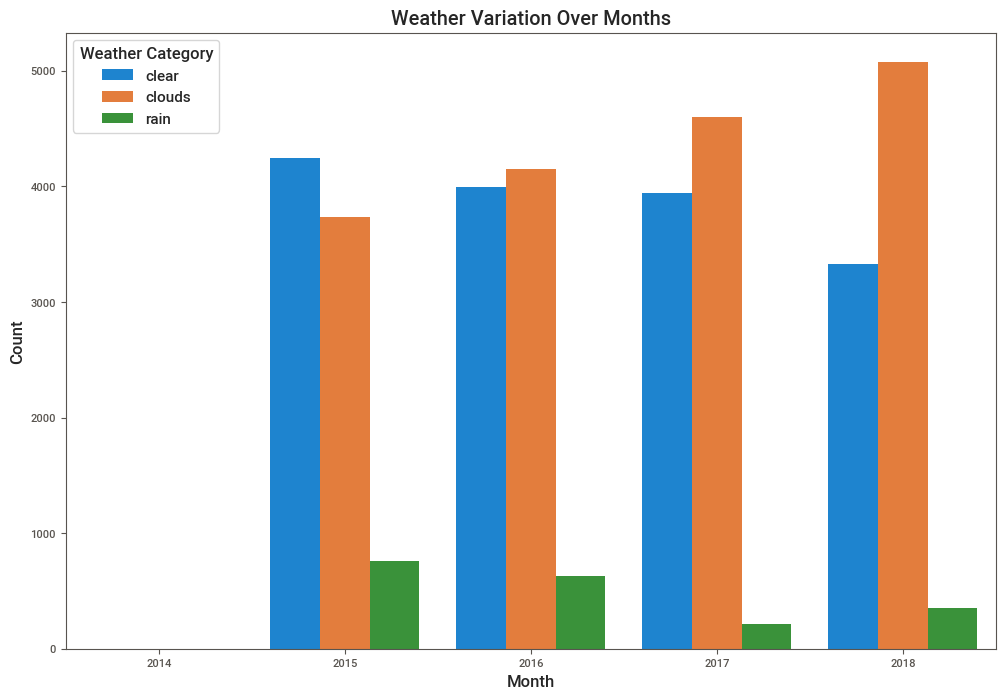

In [490]:
plt.figure(figsize=(12, 8))
sns.countplot(x='year', hue='weather_main', data=df_eda)
plt.title('Weather Variation Over Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Weather Category')
plt.show()

D:\mlproject\ipykernel_7824\255281403.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weather_corr = df_eda.groupby('weather_main').mean().corr()


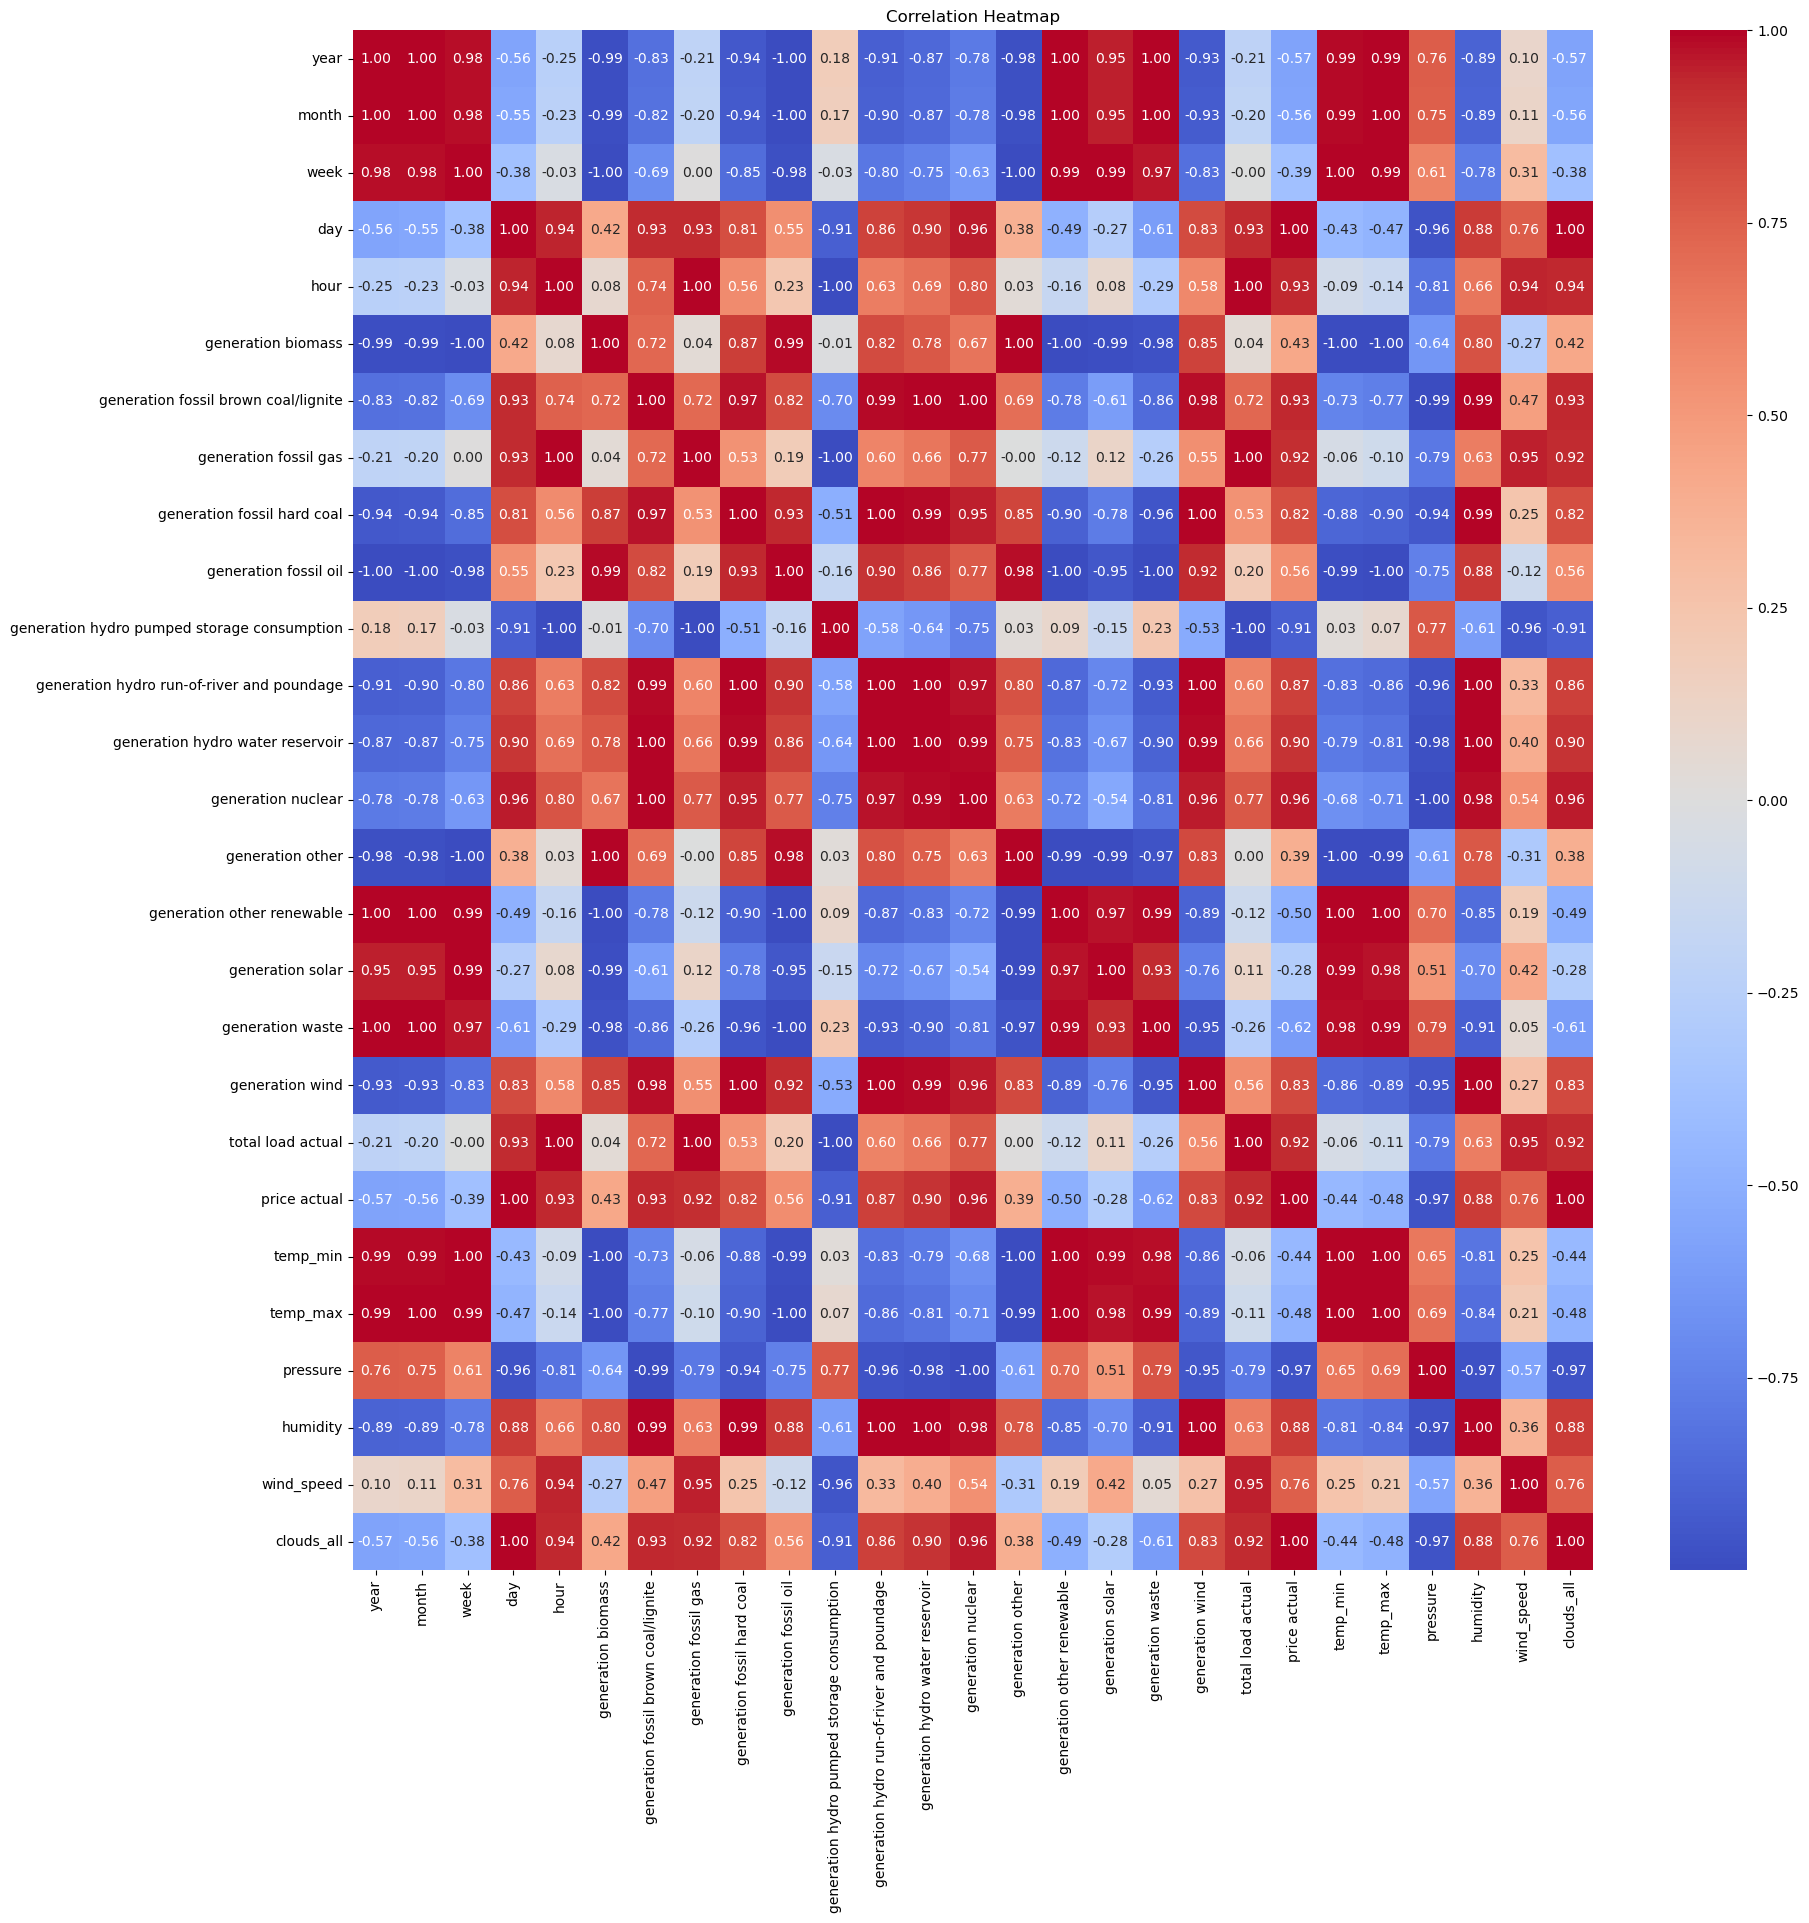

In [46]:
weather_corr = df_eda.groupby('weather_main').mean().corr()
plt.figure(figsize=(20, 20))
sns.heatmap(weather_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

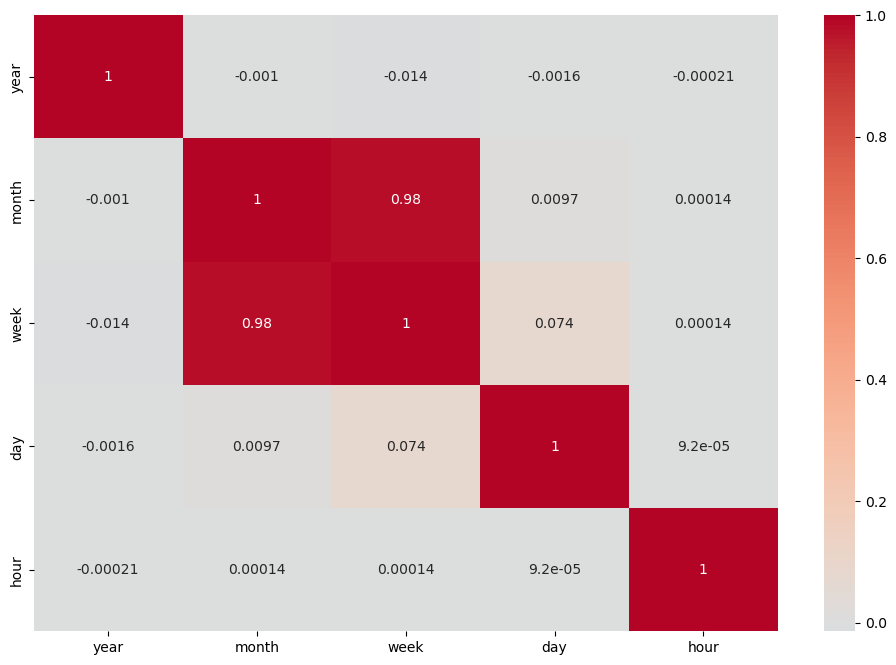

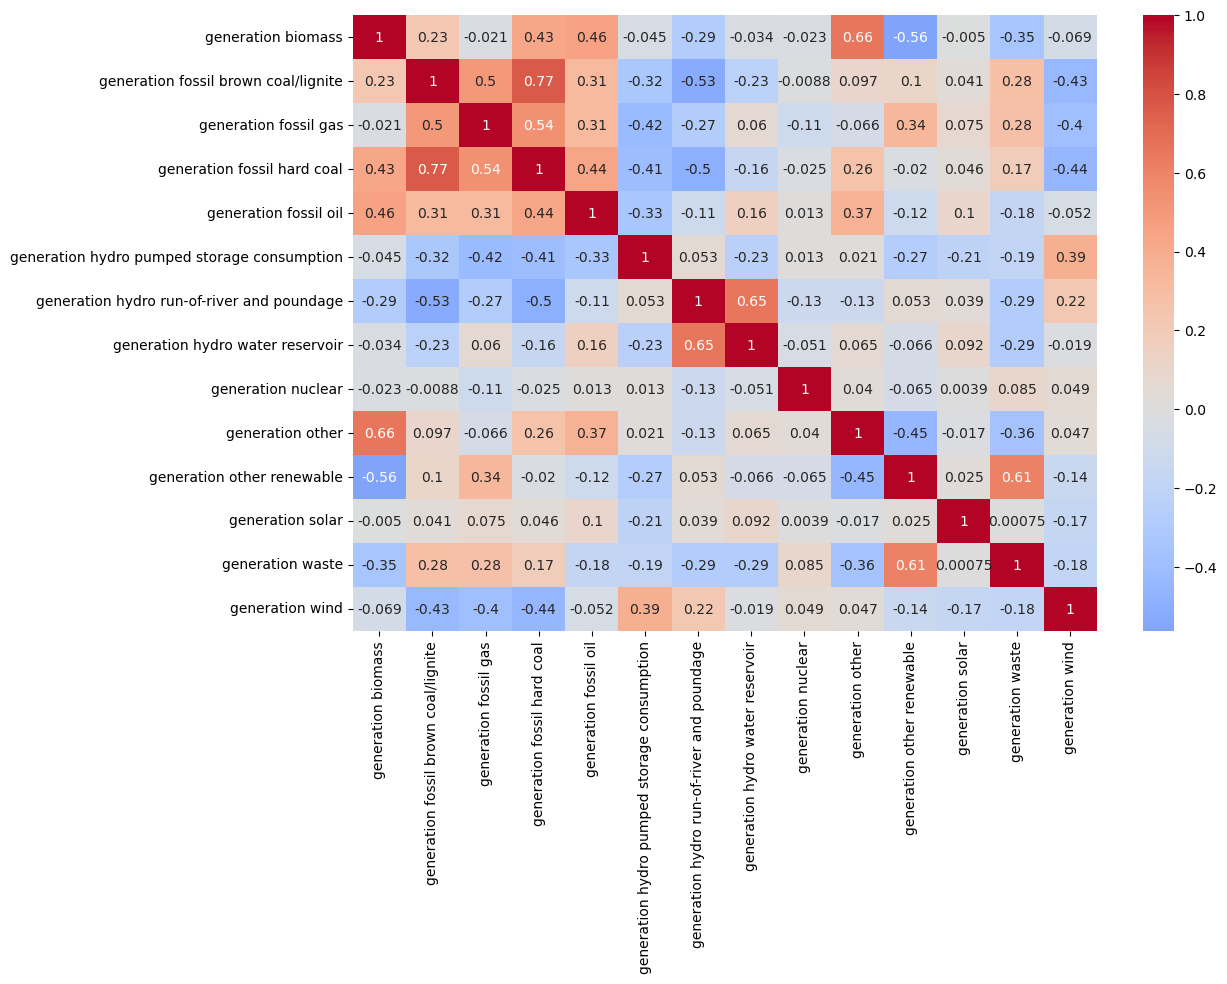

D:\mlproject\ipykernel_7824\801714909.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_eda[group].corr(), annot=True, cmap='coolwarm', center=0)


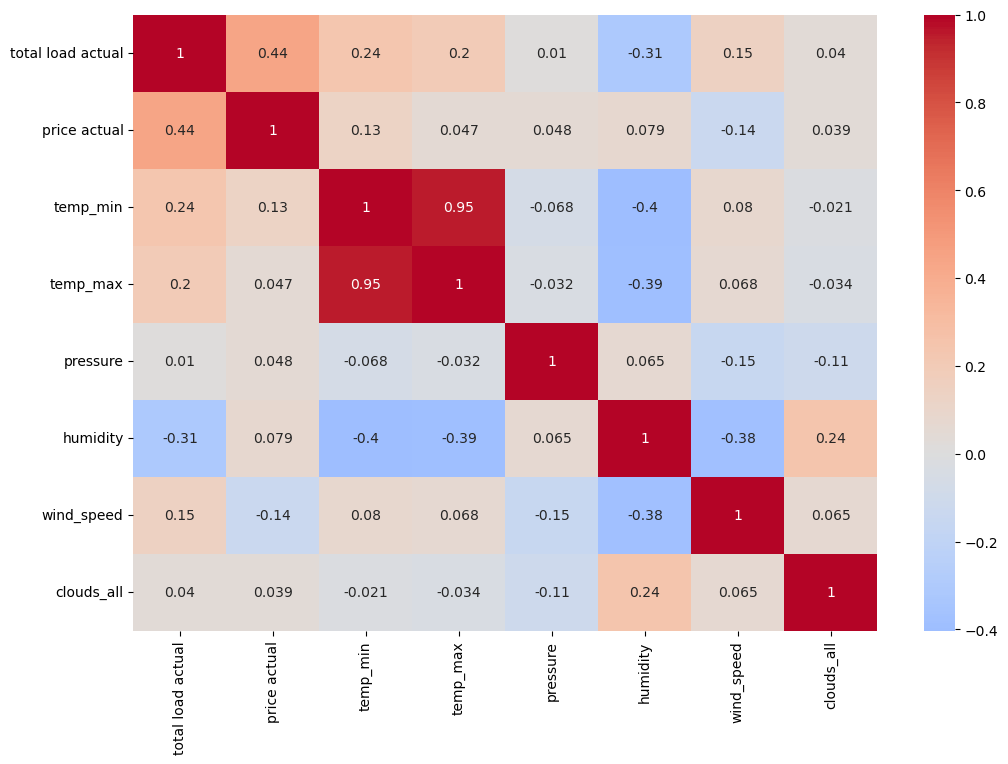

In [48]:
# List of groups based on variables
groups = [['year', 'month', 'week', 'day', 'hour'],
          ['generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas',
           'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption',
           'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation nuclear',
           'generation other', 'generation other renewable', 'generation solar', 'generation waste', 'generation wind'],
          ['total load actual', 'price actual', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'clouds_all', 'weather_main']]

# Plot heatmap for each group
for group in groups:
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_eda[group].corr(), annot=True, cmap='coolwarm', center=0)
    plt.show()

In [49]:
df_eda.columns

Index(['date', 'year', 'month', 'week', 'day', 'hour', 'generation biomass',
       'generation fossil brown coal/lignite', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind', 'total load actual',
       'price actual', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'clouds_all', 'weather_main'],
      dtype='object')

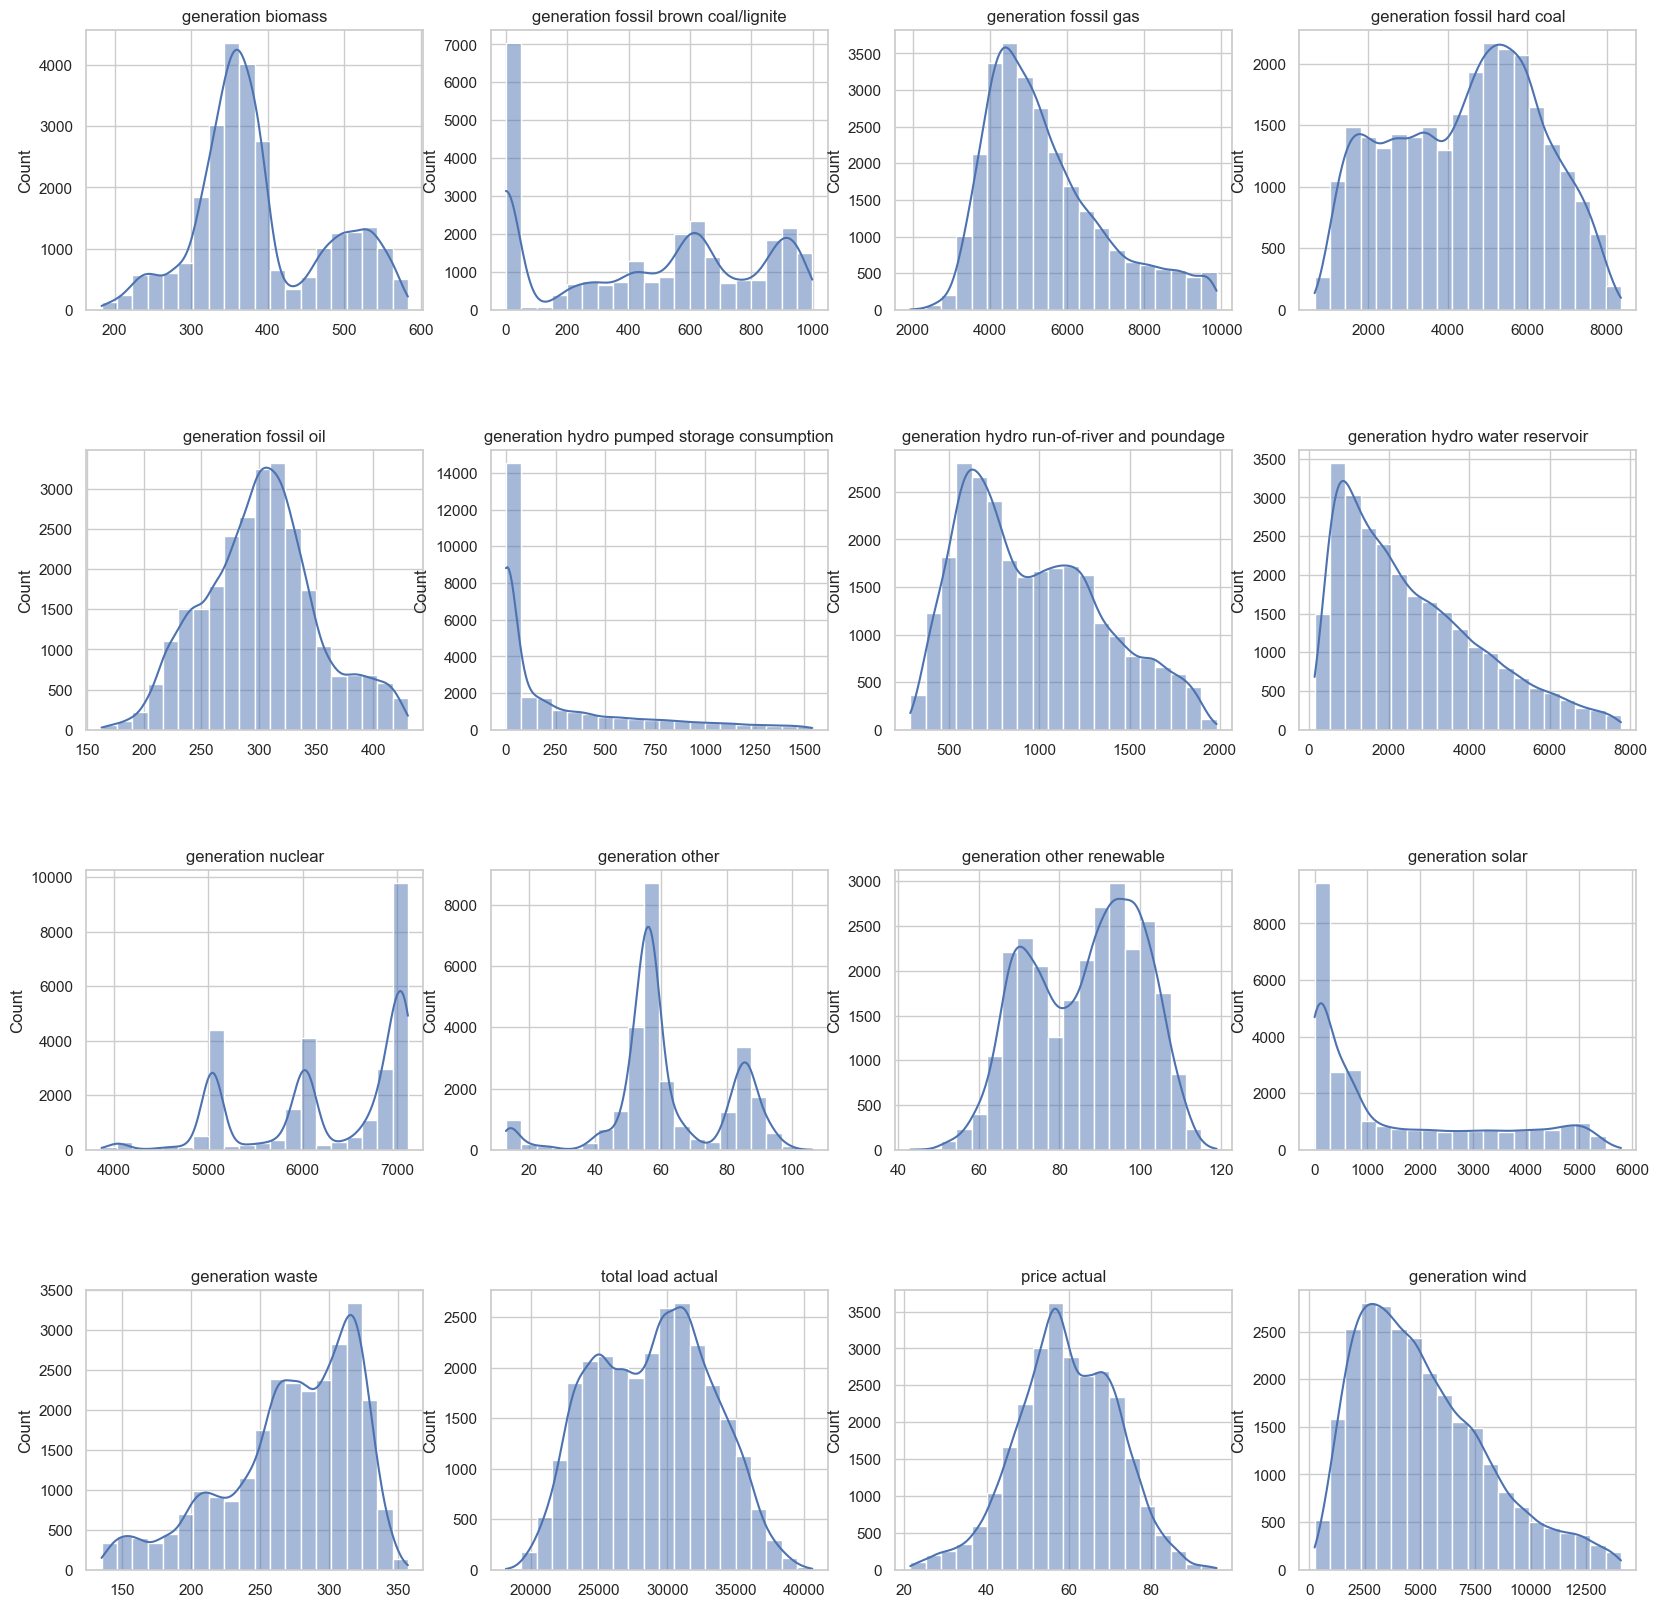

In [258]:
# Selecting columns for the subplot
selected_columns = ['generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas',
                    'generation fossil hard coal', 'generation fossil oil',
                    'generation hydro pumped storage consumption',
                    'generation hydro run-of-river and poundage', 'generation hydro water reservoir',
                    'generation nuclear', 'generation other', 'generation other renewable', 'generation solar',
                    'generation waste', 'total load actual', 'price actual', 'generation wind']

# Set the number of columns and rows for the subplot
num_cols = 4
num_rows = (len(selected_columns) - 1) // num_cols + 1

# Create a subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes array to handle the case when there's only one row or column
axes = axes.flatten()

# Plot histograms for each selected column
for i, col in enumerate(selected_columns):
    sns.histplot(df_eda[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel(None)

# Hide any empty subplots if the number of selected columns is not a multiple of num_cols
for j in range(len(selected_columns), num_rows * num_cols):
    fig.delaxes(axes[j])

# Show the plot
plt.show()

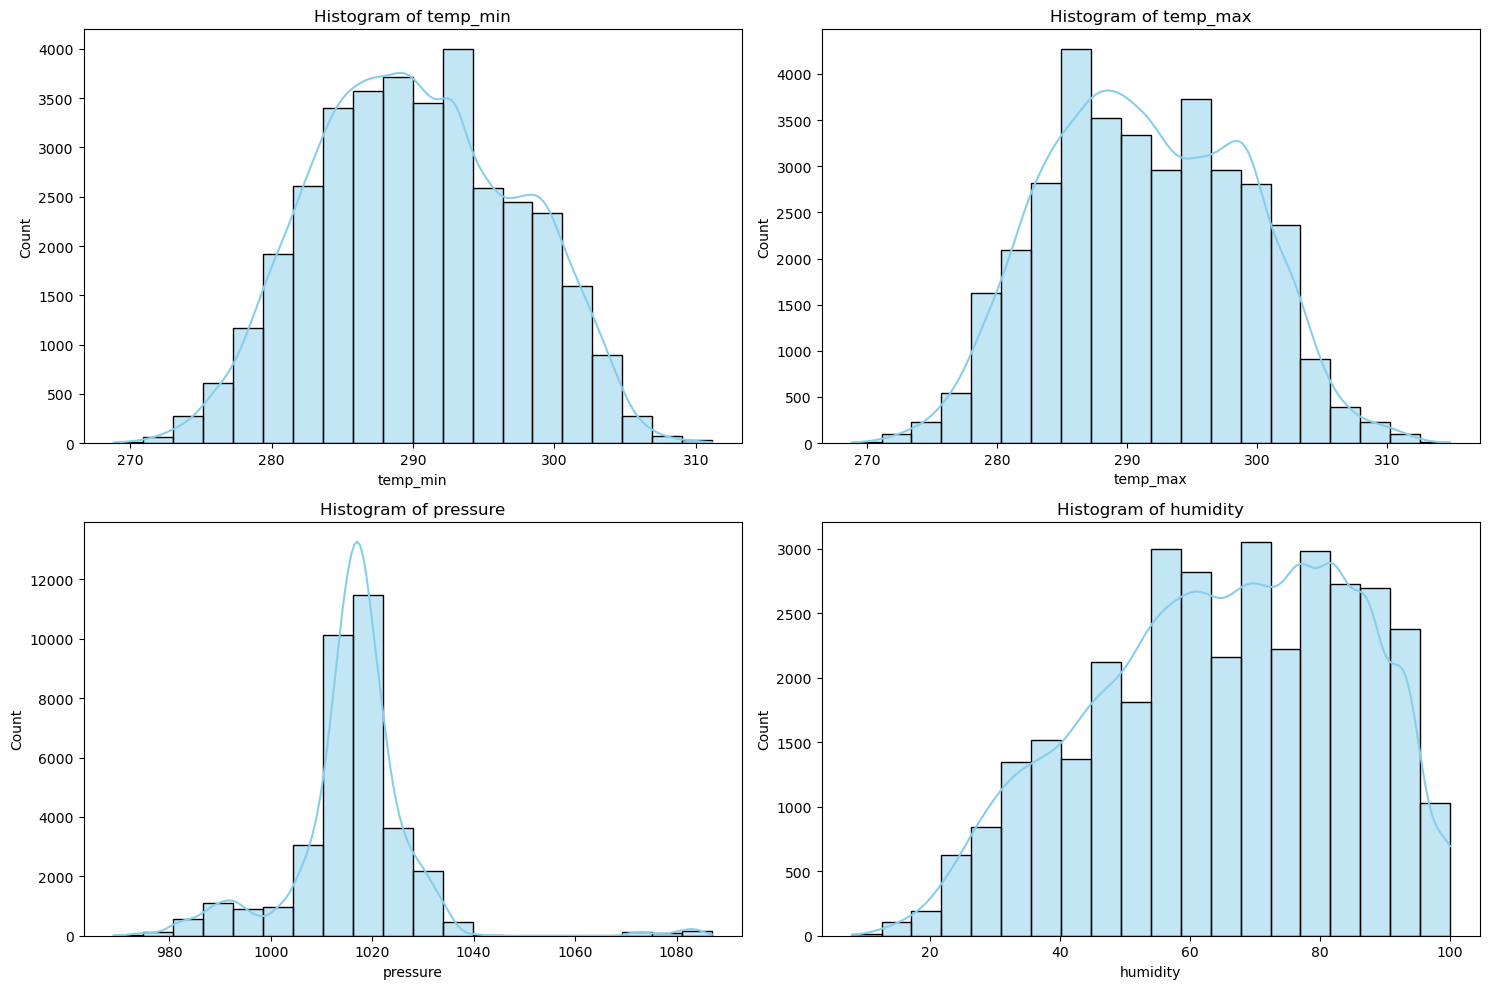

In [50]:
weather_columns = ['temp_min', 'temp_max', 'pressure', 'humidity']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through each weather variable and create histograms
for i, column in enumerate(weather_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_eda[column], bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [323]:
# generation_categories = {
# 'Fossil': ['generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal',
# 'generation fossil oil'],
# 'Hydro': ['generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage',
# 'generation hydro water reservoir'],
# 'Renewables': [ 'generation solar', 'generation waste','generation wind'],
# 'Nuclear': ['generation nuclear'],
# 'Other': ['generation other', 'generation other renewable']
# }

In [325]:
df_eda.head()

,date,year,month,week,day,hour,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,total load actual,price actual,generation wind,generation_fossil,generation_hydro,generation_renewables,generation_nuclear,generation_other
0,2014-12-31,2014,12,1,31,23,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,25385.0,65.41,6378.0,10156.0,3813.0,6623.0,7096.0,116.0
1,2015-01-01,2015,1,1,1,0,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,24382.0,64.92,5890.0,10437.0,3587.0,6135.0,7096.0,114.0
2,2015-01-01,2015,1,1,1,1,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,22734.0,64.48,5461.0,9918.0,3508.0,5707.0,7099.0,116.0
3,2015-01-01,2015,1,1,1,2,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,21286.0,59.32,5238.0,8859.0,3231.0,5479.0,7098.0,118.0
4,2015-01-01,2015,1,1,1,3,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,20264.0,56.04,4935.0,8313.0,3499.0,5166.0,7097.0,117.0


In [247]:
df_eda.to_csv('EDA_pb.csv', index=False)

In [300]:
df_eda.columns

Index(['date', 'year', 'month', 'week', 'day', 'hour', 'generation biomass',
       'generation fossil brown coal/lignite', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'total load actual', 'price actual',
       'generation wind', 'generation_fossil', 'generation_hydro',
       'generation_renewables', 'generation_nuclear', 'generation_other'],
      dtype='object')

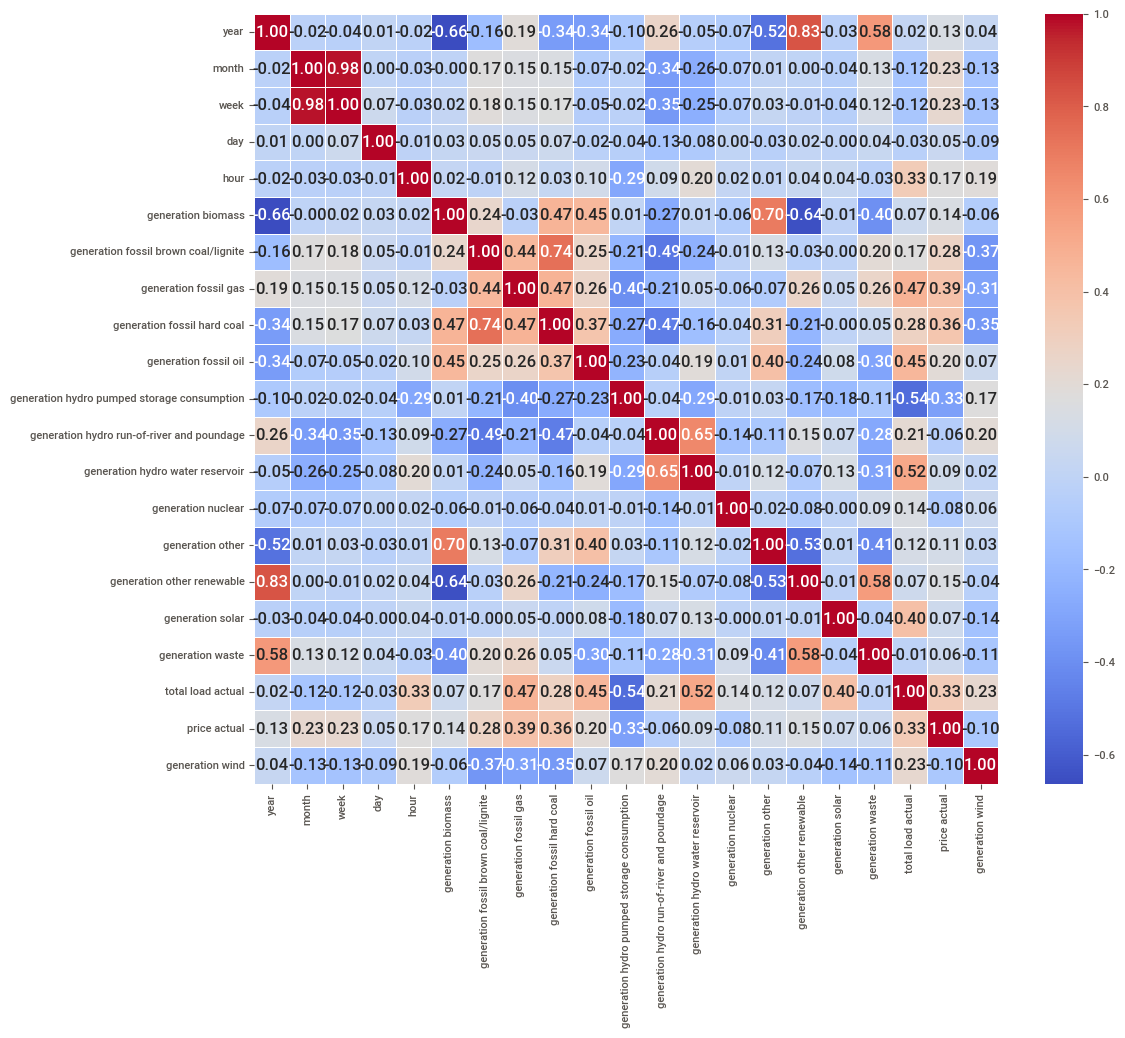

In [305]:
# Selecting all numerical columns
numerical_columns = ['year', 'month', 'week', 'day', 'hour','generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas',
                    'generation fossil hard coal', 'generation fossil oil',
                    'generation hydro pumped storage consumption',
                    'generation hydro run-of-river and poundage', 'generation hydro water reservoir',
                    'generation nuclear', 'generation other', 'generation other renewable', 'generation solar',
                    'generation waste', 'total load actual', 'price actual', 'generation wind']

# Create a correlation matrix
correlation_matrix = df_eda[numerical_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

In [306]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26828 entries, 11 to 35063
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   date                                         26828 non-null  object 
 1   year                                         26828 non-null  int64  
 2   month                                        26828 non-null  int64  
 3   week                                         26828 non-null  UInt32 
 4   day                                          26828 non-null  int64  
 5   hour                                         26828 non-null  int64  
 6   generation biomass                           26828 non-null  float64
 7   generation fossil brown coal/lignite         26828 non-null  float64
 8   generation fossil gas                        26828 non-null  float64
 9   generation fossil hard coal                  26828 non-null  float64
 1

# Feature Engineering

In [51]:
# List of generation columns
generation_columns = ['generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas',
                      'generation fossil hard coal', 'generation fossil oil',
                      'generation hydro pumped storage consumption',
                      'generation hydro run-of-river and poundage', 'generation hydro water reservoir',
                      'generation nuclear', 'generation other', 'generation other renewable', 'generation solar',
                      'generation waste', 'generation wind']

# Add a new column 'total load generated' by summing up all generation columns
df_eda['total load generated'] = df_eda[generation_columns].sum(axis=1)

# Display the DataFrame with the new column
df_eda.head()

,date,year,month,week,day,hour,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_main,total load generated
0,2014-12-31,2014,12,1,31,23,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41,270.475,270.475,1001,77,1,0,clear,28251.0
5,2015-01-01,2015,1,1,1,0,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92,270.475,270.475,1001,77,1,0,clear,27818.0
10,2015-01-01,2015,1,1,1,1,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48,269.686,269.686,1002,78,0,0,clear,26796.0
15,2015-01-01,2015,1,1,1,2,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32,269.686,269.686,1002,78,0,0,clear,25223.0
20,2015-01-01,2015,1,1,1,3,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04,269.686,269.686,1002,78,0,0,clear,24620.0


In [52]:
# Create a new column 'demand_supply_difference'
df_eda['demand_supply_difference'] = df_eda['total load generated'] - df_eda['total load actual']

In [458]:
df_eda[['date', 'hour', 'demand_supply_difference']].head()

,date,hour,demand_supply_difference
0,2014-12-31,23,2866.0
5,2015-01-01,0,3436.0
10,2015-01-01,1,4062.0
15,2015-01-01,2,3937.0
20,2015-01-01,3,4356.0


In [459]:
df_eda.tail()

,date,year,month,week,day,hour,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_main,total load generated,demand_supply_difference
178371,2018-12-31,2018,12,1,31,18,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,30653.0,77.02,285.15,286.15,1028,62,2,0,clear,26415.0,-4238.0
178376,2018-12-31,2018,12,1,31,19,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,95.0,33.0,280.0,3288.0,29735.0,76.16,282.15,284.15,1029,71,1,0,clear,25213.0,-4522.0
178381,2018-12-31,2018,12,1,31,20,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,94.0,31.0,286.0,3503.0,28071.0,74.30,281.15,282.15,1029,81,3,0,clear,23987.0,-4084.0
178386,2018-12-31,2018,12,1,31,21,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,61.0,93.0,31.0,287.0,3586.0,25801.0,69.89,279.15,281.15,1029,81,2,0,clear,22748.0,-3053.0
178391,2018-12-31,2018,12,1,31,22,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,92.0,31.0,287.0,3651.0,24455.0,69.88,278.15,280.15,1029,75,2,0,clear,22605.0,-1850.0


In [53]:
df_eda['shifted_demand_supply'] = df_eda['demand_supply_difference'].shift(-1)

In [461]:
df_eda[['date', 'hour', 'shifted_demand_supply']].head()

,date,hour,shifted_demand_supply
0,2014-12-31,23,3436.0
5,2015-01-01,0,4062.0
10,2015-01-01,1,3937.0
15,2015-01-01,2,4356.0
20,2015-01-01,3,4326.0


In [462]:
df_eda[['date', 'hour', 'shifted_demand_supply']].tail()

,date,hour,shifted_demand_supply
178371,2018-12-31,18,-4522.0
178376,2018-12-31,19,-4084.0
178381,2018-12-31,20,-3053.0
178386,2018-12-31,21,-1850.0
178391,2018-12-31,22,NaN


In [54]:
# Assuming you want to remove the last row since while building model it will cause issue and error
df_eda = df_eda.drop(df_eda.index[-1])

In [464]:
df_eda.columns

Index(['date', 'year', 'month', 'week', 'day', 'hour', 'generation biomass',
       'generation fossil brown coal/lignite', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind', 'total load actual',
       'price actual', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'clouds_all', 'weather_main', 'total load generated',
       'demand_supply_difference', 'shifted_demand_supply'],
      dtype='object')

In [337]:
df_eda.shape

(35016, 30)

# Model Building

In [55]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [56]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm

In [57]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split

In [58]:
# Assuming df_clean is your DataFrame
X = df_eda[['month','week','day','hour',
            'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas',
            'generation fossil hard coal', 'generation fossil oil',
            'generation hydro pumped storage consumption',
            'generation hydro run-of-river and poundage', 'generation hydro water reservoir',
            'generation nuclear', 'generation other', 'generation other renewable', 'generation solar',
            'generation waste', 'generation wind','temp_min', 'temp_max', 'pressure', 'humidity',
            'wind_speed', 'clouds_all', 'weather_main','total load actual','price actual']]

y = df_eda["shifted_demand_supply"]

In [59]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [60]:
X = preprocessor.fit_transform(X)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((28013, 29), (7004, 29))

In [62]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [63]:
import plotly.graph_objects as go


In [64]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

results_df = pd.DataFrame(columns=['Model', 'Train RMSE', 'Train MAE', 'Train R2', 'Test RMSE', 'Test MAE', 'Test R2'])

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    # Append results to DataFrame
    results_df = results_df.append({
        'Model': model_name,
        'Train RMSE': model_train_rmse,
        'Train MAE': model_train_mae,
        'Train R2': model_train_r2,
        'Test RMSE': model_test_rmse,
        'Test MAE': model_test_mae,
        'Test R2': model_test_r2
    }, ignore_index=True)

# Display the results DataFrame
results_df.head(10)

D:\mlproject\ipykernel_7824\1922428578.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
D:\mlproject\ipykernel_7824\1922428578.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
D:\mlproject\ipykernel_7824\1922428578.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
D:\mlproject\ipykernel_7824\1922428578.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
D:\mlproject\ipykernel_7824\1922428578.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future v

,Model,Train RMSE,Train MAE,Train R2,Test RMSE,Test MAE,Test R2
0,Linear Regression,923.044899,630.499795,0.872424,897.597638,632.249179,0.875216
1,Lasso,923.213298,631.043261,0.872377,898.151680,632.783368,0.875062
2,Ridge,923.042752,630.522394,0.872424,897.646017,632.287143,0.875202
3,K-Neighbors Regressor,892.954604,619.140121,0.880606,1119.938438,797.765677,0.805739
4,Decision Tree,0.000000,0.000000,1.000000,1396.296880,978.183324,0.698038
5,Random Forest Regressor,349.756875,246.019521,0.981683,912.936066,654.009612,0.870915
6,XGBRegressor,507.661029,383.704657,0.961410,767.215613,563.118433,0.908834
7,CatBoosting Regressor,578.256643,422.767525,0.949931,679.091130,491.733359,0.928575
8,AdaBoost Regressor,1660.616405,1340.190872,0.587083,1667.625793,1334.116124,0.569281


In [97]:
X = df_eda[['month','week','day','hour',
            'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas',
            'generation fossil hard coal', 'generation fossil oil',
            'generation hydro pumped storage consumption',
            'generation hydro run-of-river and poundage', 'generation hydro water reservoir',
            'generation nuclear', 'generation other', 'generation other renewable', 'generation solar',
            'generation waste', 'generation wind','temp_min', 'temp_max', 'pressure', 'humidity',
            'wind_speed', 'clouds_all', 'weather_main','total load actual','price actual']]

y = df_eda["shifted_demand_supply"]


# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

X_transformed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Build the CatBoost Regressor model
lr_model = CatBoostRegressor(verbose=False)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)


## MODEL EVALUATION

In [99]:
# Evaluate the model
y_diff = y_test - y_pred

# Calculate MAE for positive and negative values separately
positive_mae = mean_absolute_error(y_test[y_diff >= 0], y_pred[y_diff >= 0])
negative_mae = mean_absolute_error(y_test[y_diff < 0], y_pred[y_diff < 0])

# Calculate overall MAE and R-squared
overall_mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"MAE for positive values: {positive_mae}")
print(f"MAE for negative values: {negative_mae}")
print(f"Overall MAE: {overall_mae}")
print(f"R-squared (R2): {r2}")

MAE for positive values: 490.7005999005957
MAE for negative values: 492.73991325268156
Overall MAE: 491.7333589611109
R-squared (R2): 0.9285746149512178


In [112]:
# Get the feature names after one-hot encoding
feature_names = preprocessor.named_transformers_['OneHotEncoder'].get_feature_names_out(cat_features)

# Combine feature names with numeric feature names
all_feature_names = np.concatenate([ num_features,feature_names])

# Add constant term to feature names
all_feature_names = ['const'] + all_feature_names.tolist()

# Add constant term to X_train
X_train = sm.add_constant(X_train)

# Fit the OLS model
model = sm.OLS(y_train, X_train)
results = model.fit()

# Print the summary with meaningful variable names
print(results.summary(xname=all_feature_names))

                              OLS Regression Results                             
Dep. Variable:     shifted_demand_supply   R-squared:                       0.872
Model:                               OLS   Adj. R-squared:                  0.872
Method:                    Least Squares   F-statistic:                     6835.
Date:                   Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                           12:10:24   Log-Likelihood:            -2.3101e+05
No. Observations:                  28013   AIC:                         4.621e+05
Df Residuals:                      27984   BIC:                         4.623e+05
Df Model:                             28                                         
Covariance Type:               nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

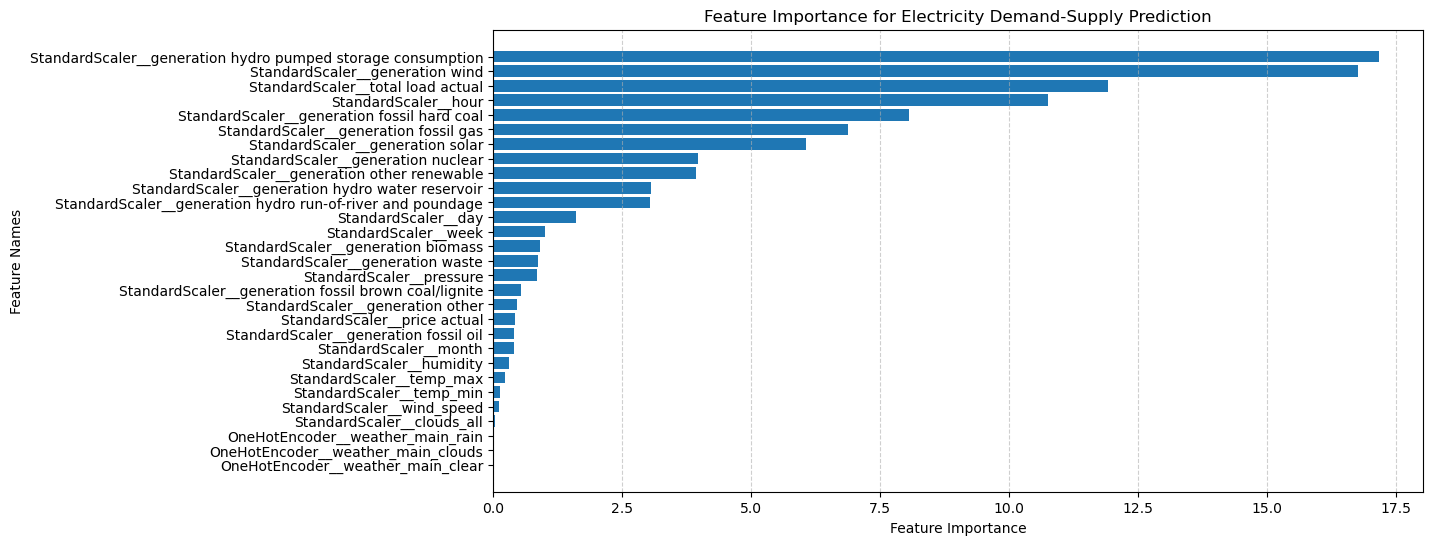

In [68]:
# Get feature importances from the model
feature_importances = lr_model.get_feature_importance(prettified=False)

# Get feature names (considering potential transformation)
feature_names = preprocessor.get_feature_names_out()  # After column transformation

# Sort feature importances and names together by importance (descending)
sorted_idx = np.argsort(feature_importances)
feature_importances = feature_importances[sorted_idx]
feature_names = feature_names[sorted_idx]

# Define plot size and create a bar chart
plt.figure(figsize=(12, 6))
plt.barh(range(len(feature_names)), feature_importances, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance for Electricity Demand-Supply Prediction')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

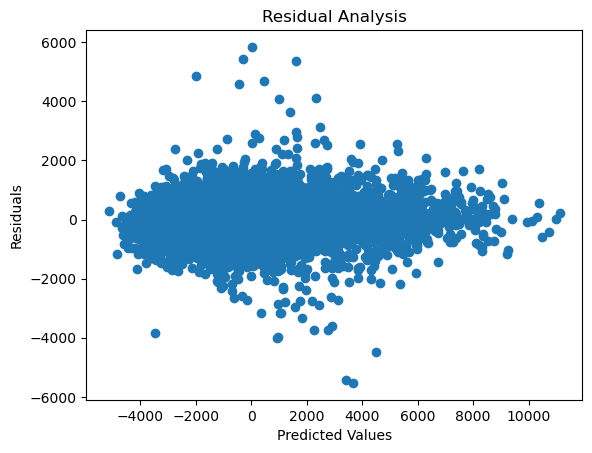

In [70]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

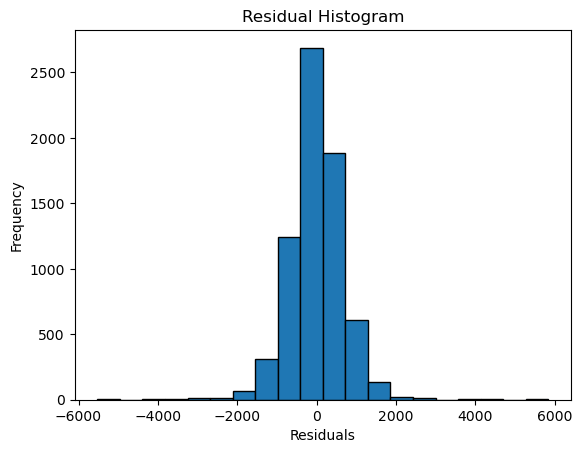

In [71]:
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Histogram')
plt.show()

In [370]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2],
    'iterations': [50, 100, 200]
}

grid_search = GridSearchCV(estimator=CatBoostRegressor(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

0:	learn: 2510.1659690	total: 13.3ms	remaining: 651ms
1:	learn: 2448.1921092	total: 25.3ms	remaining: 607ms
2:	learn: 2394.0927767	total: 36.8ms	remaining: 576ms
3:	learn: 2338.9883141	total: 47.7ms	remaining: 548ms
4:	learn: 2289.4484248	total: 59.1ms	remaining: 532ms
5:	learn: 2243.2997918	total: 70ms	remaining: 513ms
6:	learn: 2197.7703568	total: 80.5ms	remaining: 494ms
7:	learn: 2156.7238057	total: 91ms	remaining: 478ms
8:	learn: 2118.4820311	total: 100ms	remaining: 457ms
9:	learn: 2082.9502295	total: 111ms	remaining: 442ms
10:	learn: 2050.8327627	total: 121ms	remaining: 430ms
11:	learn: 2020.0726700	total: 131ms	remaining: 415ms
12:	learn: 1990.5881979	total: 142ms	remaining: 403ms
13:	learn: 1962.0448113	total: 152ms	remaining: 390ms
14:	learn: 1936.6441007	total: 162ms	remaining: 379ms
15:	learn: 1913.3790993	total: 172ms	remaining: 367ms
16:	learn: 1890.8183493	total: 183ms	remaining: 355ms
17:	learn: 1870.4747885	total: 194ms	remaining: 344ms
18:	learn: 1849.0090448	total: 204

In [372]:
best_params

{'depth': 8, 'iterations': 200, 'learning_rate': 0.2}

In [77]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the data types of each feature in X_train
non_numeric_features = X_train.select_dtypes(exclude=['number']).columns

# If there are non-numeric features, preprocess them
if len(non_numeric_features) > 0:
    # Remove non-numeric features or handle them appropriately
    X_train = X_train.drop(columns=non_numeric_features)
    X_val = X_val.drop(columns=non_numeric_features)

# Create Pools for training and validation
train_pool = Pool(X_train, y_train)
val_pool = Pool(X_val, y_val)

# Create a CatBoostRegressor model
lr_model = CatBoostRegressor(iterations=700, depth=10, learning_rate=0.05, loss_function='MAE')

# Train the model
lr_model.fit(train_pool, eval_set=val_pool, verbose=100)

0:	learn: 1913.3205940	test: 1879.6927452	best: 1879.6927452 (0)	total: 81.9ms	remaining: 57.3s
100:	learn: 739.3252862	test: 786.5133757	best: 786.5133757 (100)	total: 6.28s	remaining: 37.2s
200:	learn: 572.8337088	test: 658.6617544	best: 658.6617544 (200)	total: 13.1s	remaining: 32.5s
300:	learn: 478.0319392	test: 592.5791737	best: 592.5791737 (300)	total: 20.3s	remaining: 27s
400:	learn: 419.2407838	test: 557.1384070	best: 557.1384070 (400)	total: 28.2s	remaining: 21s
500:	learn: 376.9269860	test: 534.6166128	best: 534.6166128 (500)	total: 35.1s	remaining: 13.9s
600:	learn: 345.1710321	test: 520.0023532	best: 520.0023532 (600)	total: 42.5s	remaining: 7s
699:	learn: 319.1478032	test: 509.0812191	best: 509.0812191 (699)	total: 53.3s	remaining: 0us

bestTest = 509.0812191
bestIteration = 699



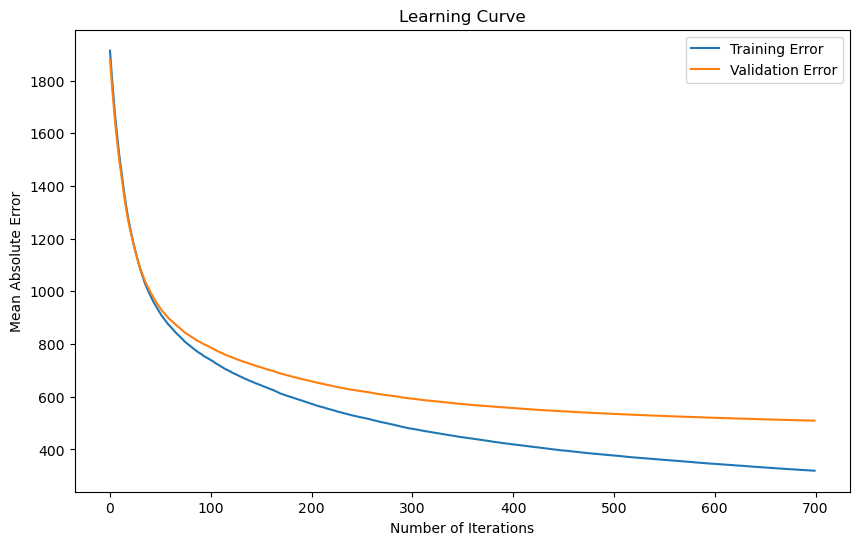

In [78]:
# Get the training and validation errors
train_error = lr_model.get_evals_result()['learn']['MAE']
val_error = lr_model.get_evals_result()['validation']['MAE']

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_error, label='Training Error')
plt.plot(val_error, label='Validation Error')
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Absolute Error')
plt.title('Learning Curve')
plt.legend()
plt.show()

- the training error and validation error both decrease as the number of iterations increases. This means that the model is learning from the data and improving its performance. The fact that the validation error is also decreasing suggests that the model is not overfitting the training data.

In [84]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
101444,821.0,549.526910,271.473090
52690,336.0,191.759550,144.240450
96418,-2183.0,-1030.401588,-1152.598412
172053,2468.0,1889.735229,578.264771
154564,-2320.0,-1777.406314,-542.593686
...,...,...,...
72175,-2443.0,-1607.364077,-835.635923
79633,1735.0,2124.374587,-389.374587
93914,3108.0,3753.393991,-645.393991
162446,-2334.0,-2357.571486,23.571486


In [85]:
# Count positive and negative instances in the actual values
actual_positive_count = (pred_df['Actual Value'] > 0).sum()
actual_negative_count = (pred_df['Actual Value'] < 0).sum()

# Count positive and negative instances in the predicted values
predicted_positive_count = (pred_df['Predicted Value'] > 0).sum()
predicted_negative_count = (pred_df['Predicted Value'] < 0).sum()

print("Actual Values:")
print(f"Positive count: {actual_positive_count}")
print(f"Negative count: {actual_negative_count}")

print("\nPredicted Values:")
print(f"Positive count: {predicted_positive_count}")
print(f"Negative count: {predicted_negative_count}")

Actual Values:
Positive count: 2924
Negative count: 4079

Predicted Values:
Positive count: 2855
Negative count: 4149


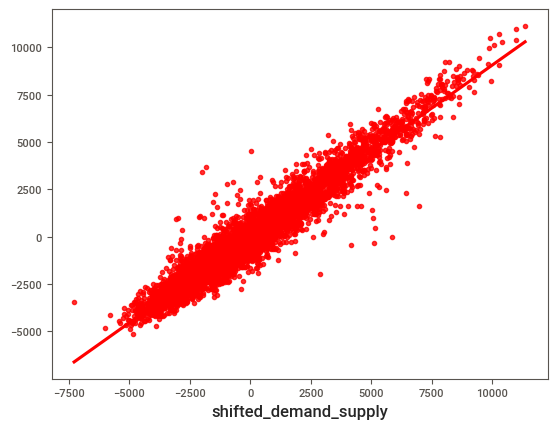

In [519]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [94]:
df_eda.to_csv('final_model.csv', index=False)

In [95]:
# Save the trained model
lr_model.save_model('catboost_model.cbm')